# `pandas` Foundations

## Data Ingestion & Inspection

How to get data in & analyse it

In [1]:
import pandas as pd

In [14]:
aapl_url = 'https://raw.githubusercontent.com/SmilodonCub/DATA602/master/AAPL.csv'
aapl_df = pd.read_csv( aapl_url )

In [4]:
print( type( aapl_df ) )
print( aapl_df.shape )
print( aapl_df.columns )
aapl_df.head( 5 )

<class 'pandas.core.frame.DataFrame'>
(184, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [15]:
print( type( aapl_df.columns ) )
print( aapl_df.index )
aapl_df['Date'] = aapl_df['Date'].astype('datetime64[ns]')
aapl_df.set_index( 'Date' , inplace=True, drop=True)
print( aapl_df.index )
print( type( aapl_df.index ) )
aapl_df.head( 5 )

<class 'pandas.core.indexes.base.Index'>
RangeIndex(start=0, stop=184, step=1)
DatetimeIndex(['2014-09-29', '2014-10-06', '2014-10-13', '2014-10-20',
               '2014-10-27', '2014-11-03', '2014-11-10', '2014-11-17',
               '2014-11-24', '2014-12-01',
               ...
               '2018-01-29', '2018-02-05', '2018-02-12', '2018-02-19',
               '2018-02-26', '2018-03-05', '2018-03-12', '2018-03-19',
               '2018-03-26', '2018-03-29'],
              dtype='datetime64[ns]', name='Date', length=184, freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


### Slicing
with `iloc`

In [17]:
aapl_df.iloc[ :5,: ]
#aapl_df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [18]:
aapl_df.iloc[ -5:,: ]
#aapl_df.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400
2018-03-29,167.804993,171.750000,166.899994,167.779999,167.779999,38398505


In [19]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 184 entries, 2014-09-29 to 2018-03-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       184 non-null    float64
 1   High       184 non-null    float64
 2   Low        184 non-null    float64
 3   Close      184 non-null    float64
 4   Adj Close  184 non-null    float64
 5   Volume     184 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.1 KB


Each column of a `pandas` dataframe is a special structure of it's own called a `pandas Series`

In [20]:
low = aapl_df[ 'Low' ]
print( type( low ) )

<class 'pandas.core.series.Series'>


The `Series` has it's own `.head()` method and inherits the same index from the parent `DataFrame`

In [21]:
low.head()

Date
2014-09-29     98.040001
2014-10-06     98.309998
2014-10-13     95.180000
2014-10-20     98.220001
2014-10-27    104.699997
Name: Low, dtype: float64

In [23]:
#to extract just the values
print( type( low.values ) )
low.values[:5]

<class 'numpy.ndarray'>


array([ 98.040001,  98.309998,  95.18    ,  98.220001, 104.699997])

### Building DataFrames from Scratch

In [25]:
cities = [ 'Austin', 'Dalla', 'Austin', 'Dalles' ] #data for each column in multiple lists
signups = [ 7, 12, 3, 5 ]
visitors = [ 139, 237, 326, 456 ]
weekdays = [ 'Sun', 'Sun', 'Mon', 'Mon' ]
list_labels = [ 'city', 'signups', 'visitors', 'weekday' ]
list_cols = [ cities, signups, visitors, weekdays ] #list of lists
zipped = list( zip( list_labels, list_cols ) ) 
data = dict( zipped )
users = pd.DataFrame( data )
print( users )

     city  signups  visitors weekday
0  Austin        7       139     Sun
1   Dalla       12       237     Sun
2  Austin        3       326     Mon
3  Dalles        5       456     Mon


In [26]:
#creating new features
users[ 'fees' ] = 0 #broadcast the value 0 to an entire column
print( users )

     city  signups  visitors weekday  fees
0  Austin        7       139     Sun     0
1   Dalla       12       237     Sun     0
2  Austin        3       326     Mon     0
3  Dalles        5       456     Mon     0


In [28]:
users.index = [ 'A', 'B', 'C', 'D' ] #customize the index values
users.columns = [ 'City', 'Signups', 'Visitors', 'Weekday', 'Fees' ] #change the column labels
print( users )

     City  Signups  Visitors Weekday  Fees
A  Austin        7       139     Sun     0
B   Dalla       12       237     Sun     0
C  Austin        3       326     Mon     0
D  Dalles        5       456     Mon     0


### Importing & Exporting Data

In [45]:
sunspot_url = 'https://raw.githubusercontent.com/SmilodonCub/DATA602/master/ISSN_D_tot.csv'
sunspot_df = pd.read_csv( sunspot_url )
sunspot_df.head()

,1818,01,01.1,1818.004,-1,1
0,1818,1,2,1818.007,-1,1
1,1818,1,3,1818.010,-1,1
2,1818,1,4,1818.012,-1,1
3,1818,1,5,1818.015,-1,1
4,1818,1,6,1818.018,-1,1


In [46]:
sunspot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72103 entries, 0 to 72102
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   1818      72103 non-null  int64  
 1   01        72103 non-null  int64  
 2   01.1      72103 non-null  int64  
 3   1818.004  72103 non-null  float64
 4    -1       72103 non-null  int64  
 5   1         72103 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 3.3 MB


In [47]:
sunspot_df.iloc[ 10:20, : ]

,1818,01,01.1,1818.004,-1,1
10,1818,1,12,1818.034,-1,1
11,1818,1,13,1818.037,22,1
12,1818,1,14,1818.040,-1,1
13,1818,1,15,1818.042,-1,1
14,1818,1,16,1818.045,-1,1
15,1818,1,17,1818.048,46,1
16,1818,1,18,1818.051,59,1
17,1818,1,19,1818.053,63,1
18,1818,1,20,1818.056,-1,1
19,1818,1,21,1818.059,-1,1


looking at the slice, the column labels make no sence (are they really a row?), and what's up with the -1 entries?

In [48]:
#explicitly label the columns 
col_names = [ 'year', 'month', 'day', 'dec_date', 'sunspots', 'definite' ]
#use the header parameter to indicaate that the source file has no header & set the column names
#change the -1 values to NA
sunspot_df = pd.read_csv( sunspot_url, header=None, names = col_names, 
                         na_values = {'sunspots':[' -1']}, parse_dates = [ [ 0, 1, 2 ] ] )
sunspot_df.head( 10 )

,year_month_day,dec_date,sunspots,definite
0,1818-01-01,1818.004,NaN,1
1,1818-01-02,1818.007,NaN,1
2,1818-01-03,1818.010,NaN,1
3,1818-01-04,1818.012,NaN,1
4,1818-01-05,1818.015,NaN,1
5,1818-01-06,1818.018,NaN,1
6,1818-01-07,1818.021,NaN,1
7,1818-01-08,1818.023,39.0,1
8,1818-01-09,1818.026,NaN,1
9,1818-01-10,1818.029,NaN,1


In [49]:
sunspot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72104 entries, 0 to 72103
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year_month_day  72104 non-null  datetime64[ns]
 1   dec_date        72104 non-null  float64       
 2   sunspots        68857 non-null  float64       
 3   definite        72104 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.2 MB


In [51]:
sunspot_df.index = sunspot_df[ 'year_month_day' ]
sunspot_df.index.name = 'date'
print( sunspot_df.info() )
sunspot_df.head( 5 )

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72104 entries, 1818-01-01 to 2015-05-31
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year_month_day  72104 non-null  datetime64[ns]
 1   dec_date        72104 non-null  float64       
 2   sunspots        68857 non-null  float64       
 3   definite        72104 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.8 MB
None


,year_month_day,dec_date,sunspots,definite
date,,,,
1818-01-01,1818-01-01,1818.004,NaN,1
1818-01-02,1818-01-02,1818.007,NaN,1
1818-01-03,1818-01-03,1818.010,NaN,1
1818-01-04,1818-01-04,1818.012,NaN,1
1818-01-05,1818-01-05,1818.015,NaN,1


In [52]:
#select only the relevant data features
cols = [ 'sunspots', 'definite' ]
sunspots = sunspot_df[ cols ]
sunspots.head( 5 )

,sunspots,definite
date,,
1818-01-01,NaN,1
1818-01-02,NaN,1
1818-01-03,NaN,1
1818-01-04,NaN,1
1818-01-05,NaN,1


In [53]:
#writing files
out_csv = 'sunspots.csv'
sunspots.to_csv( out_csv )
#alternative: out_tsv

out_xlsx = 'sunspots.xlsx'
sunspots.to_excel( out_xlsx )

### Plotting with `pandas`

In [55]:
#load pyplot
import matplotlib.pyplot as plt

In [56]:
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [59]:
#plot numpy arrays
close_arr = aapl_df[ 'Close' ].values
type( close_arr )

numpy.ndarray

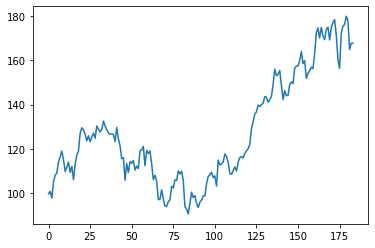

In [60]:
plt.plot( close_arr )
plt.show()

In [62]:
close_series = aapl_df[ 'Close' ]
type( close_series )

pandas.core.series.Series

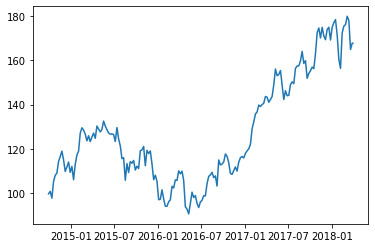

In [63]:
plt.plot( close_series )
plt.show()

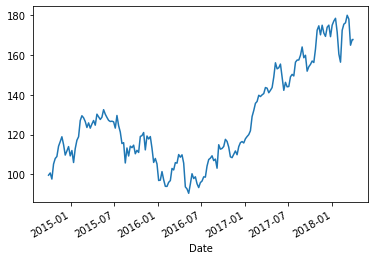

In [64]:
#pandas series plot method
close_series.plot()
plt.show()

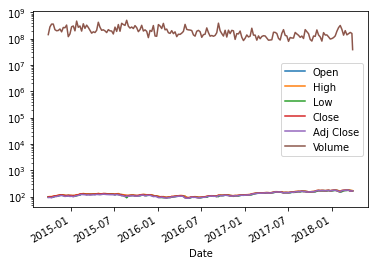

In [66]:
#pandas DataFrame plotmethod
aapl_df.plot()
plt.yscale( 'log' ) #sets a logarithmic scle on the vertical axis
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

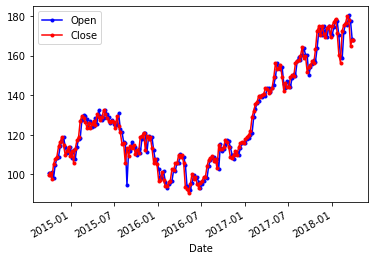

In [70]:
#customizing plots
aapl_df[ 'Open' ].plot( color = 'b', style = '.-', legend = True )
aapl_df[ 'Close' ].plot( color = 'r', style = '.-', legend = True )
#plt.axis( ( '2001', '2002', 0, 100) )
plt.show

In [71]:
#saving plots
#plt.savefig( 'aapl.png' ) #can infer the format from the suffix

## Visual Exploratory Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris_dat = load_iris() 
iris_df = pd.DataFrame( iris_dat.data, columns = iris_dat.feature_names )
print( iris_df.shape )
iris_df.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


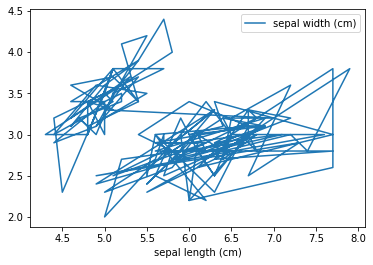

In [6]:
iris_df.plot( x = 'sepal length (cm)', y = 'sepal width (cm)' )
plt.show()

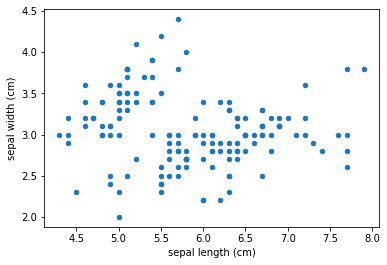

In [7]:
iris_df.plot( x = 'sepal length (cm)', y = 'sepal width (cm)', kind = 'scatter' )
plt.xlabel( 'sepal length (cm)' )
plt.ylabel( 'sepal width (cm)' )
plt.show()

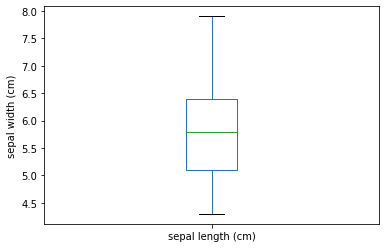

In [8]:
iris_df.plot( y = 'sepal length (cm)', kind = 'box' )
plt.ylabel( 'sepal width (cm)' )
plt.show()

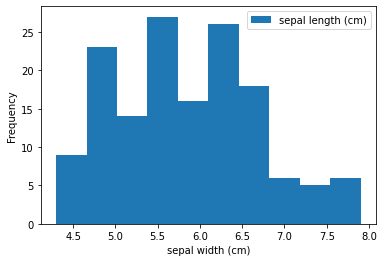

In [39]:
iris_df.plot( y = 'sepal length (cm)', kind = 'hist' )
plt.xlabel( 'sepal width (cm)' )
plt.show()

Histogram options:
1. bins
2. range
3. normed (bool: normalize the data)
4. cumulative (bool: compute the CDF)

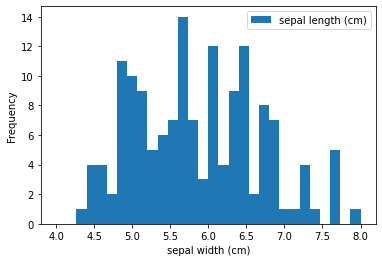

In [38]:
iris_df.plot( y = 'sepal length (cm)', kind = 'hist',
            bins = 30, range = ( 4,8 ) )
plt.xlabel( 'sepal width (cm)' )
plt.show()

**CDF**: Cumulative Distribution Functions are useful for calculating the probability of finding a given measurement

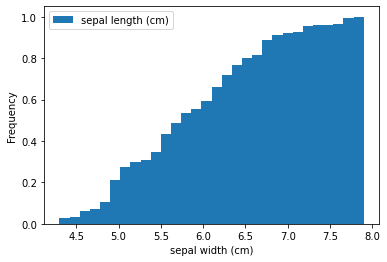

In [42]:
iris_df.plot( y = 'sepal length (cm)', kind = 'hist', bins = 30, density= True, cumulative = True )
plt.xlabel( 'sepal width (cm)' )
plt.show()

### Statistical Exploratory Data Analysis

In [43]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


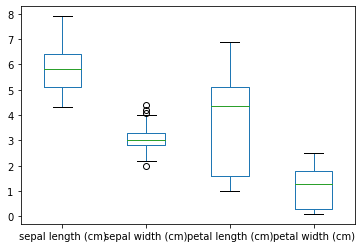

In [46]:
iris_df.plot( kind='box' )
plt.show()

0.8
19.0


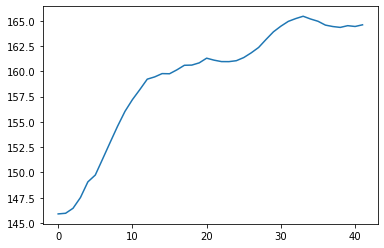

In [49]:
edu_url = 'https://assets.datacamp.com/production/repositories/497/datasets/5f4f1a9bab95fba4d7fea1ad3c30dcab8f5b9c96/percent-bachelors-degrees-women-usa.csv'
df = pd.read_csv( edu_url )

# Print the minimum value of the Engineering column
print( df['Engineering'].min( ) )

# Print the maximum value of the Engineering column
print( df['Engineering'].max( ) )

# Construct the mean percentage per year: mean
mean = df.mean( axis = 'columns' )

# Plot the average percentage per year
mean.plot()

# Display the plot
plt.show()

### Separating Populations

In [52]:
import numpy as np
names = np.array( ['setosa', 'versicolor', 'virginica'] )
species = np.repeat( names, [ 50, 50, 50 ], axis=0 )
iris_df['species'] = species
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


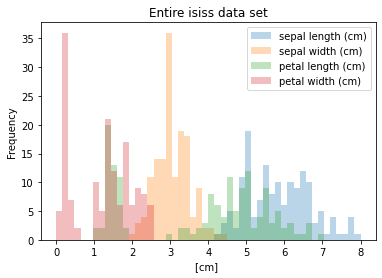

In [53]:
iris_df.plot( kind = 'hist', bins=50, range=(0,8), alpha=0.3)
plt.title( 'Entire isiss data set' )
plt.xlabel( '[cm] ' )
plt.show()

In [55]:
setosa = iris_df[species == 'setosa']
verginica = iris_df[species == 'virginica']
versicolor = iris_df[species == 'versicolor']

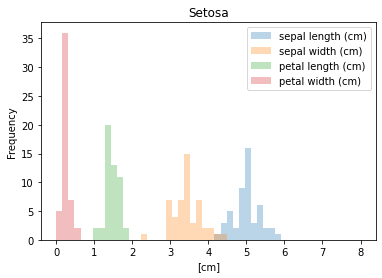

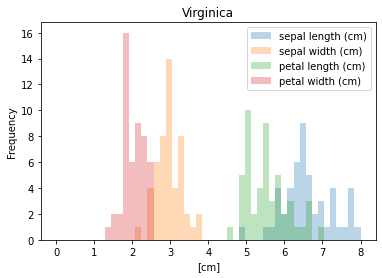

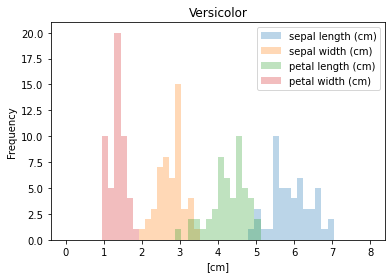

In [59]:
setosa.plot( kind = 'hist', bins=50, range=(0,8), alpha=0.3)
plt.title( 'Setosa' )
plt.xlabel( '[cm]' )
plt.show()

verginica.plot( kind = 'hist', bins=50, range=(0,8), alpha=0.3)
plt.title( 'Virginica' )
plt.xlabel( '[cm]' )
plt.show()

versicolor.plot( kind = 'hist', bins=50, range=(0,8), alpha=0.3)
plt.title( 'Versicolor' )
plt.xlabel( '[cm]' )
plt.show()

In [61]:
describe_setosa = setosa.describe()
describe_virginica = verginica.describe()
describe_versicolor = versicolor.describe()

In [63]:
#computing errors
error_setosa = 100 * np.abs( describe_setosa - iris_df.describe() )
error_setosa = error_setosa / describe_setosa

error_virginica = 100 * np.abs( describe_virginica - iris_df.describe() )
error_virginica = error_virginica / describe_virginica

error_versicolor = 100 * np.abs( describe_versicolor - iris_df.describe() )
error_versicolor = error_versicolor / describe_versicolor

## Time Series in `pandas`

### Indexing Time Series

Using pandas to read datetime objects
* read_csv() function
    + can read strings into datetime objects
    + need to specify 'parse_dates=True'
* ISO 8601 format
    + yyyy-mm-dd hh:mm:ss

In [22]:
import pandas as pd
sales_url = 'https://raw.githubusercontent.com/johnashu/datacamp/master/Sales/sales-feb-2015.csv'
sales = pd.read_csv( sales_url, parse_dates=True, index_col= 'Date' )
sales.head()

,Company,Product,Units
Date,,,
2015-02-26 08:57:45,Streeplex,Service,4
2015-02-16 12:09:19,Hooli,Software,10
2015-02-03 14:14:18,Initech,Software,13
2015-02-02 08:33:01,Hooli,Software,3
2015-02-25 00:29:00,Initech,Service,10


In [2]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2015-02-26 08:57:45 to 2015-02-21 20:41:47
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  20 non-null     object
 1   Product  20 non-null     object
 2   Units    20 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 640.0+ bytes


In [9]:
sales.loc[ '2015-02-02 08:33:01', 'Company' ]

Date
2015-02-02 08:33:01    Hooli
Name: Company, dtype: object

In [10]:
sales.loc[ '2015-02-05' ]

,Company,Product,Units
Date,,,
2015-02-05 01:53:06,Acme Coporation,Software,19
2015-02-05 22:05:03,Hooli,Service,10


**Partial String Selection**
* Alternative formats:
    + sales.loc['February 5, 2015']
    + sales.loc['2015-Feb-5']
* Whole month: sales.loc['2015-2']
* Whole year: sales.loc['2015']

In [13]:
set( sales.loc[ '2015', 'Product' ] )

{'Hardware', 'Service', 'Software'}

Converting strings to datetime

In [14]:
evening_2_11 = pd.to_datetime( [ '2015-2-11 20:00', '2015-2-11 21:00', '2015-2-11 22:00', '2015-2-11 23:00' ])
evening_2_11

DatetimeIndex(['2015-02-11 20:00:00', '2015-02-11 21:00:00',
               '2015-02-11 22:00:00', '2015-02-11 23:00:00'],
              dtype='datetime64[ns]', freq=None)

In [15]:
sales.reindex( evening_2_11 )

,Company,Product,Units
2015-02-11 20:00:00,NaN,NaN,NaN
2015-02-11 21:00:00,NaN,NaN,NaN
2015-02-11 22:00:00,NaN,NaN,NaN
2015-02-11 23:00:00,NaN,NaN,NaN


In [20]:
print( sales.sort_index().reindex( evening_2_11.sort_values(), method ='ffill' ) )
print( sales.sort_index().reindex( evening_2_11.sort_values(), method ='bfill' ) )

                       Company   Product  Units
2015-02-11 20:00:00  Mediacore  Software      7
2015-02-11 21:00:00    Initech  Software      7
2015-02-11 22:00:00    Initech  Software      7
2015-02-11 23:00:00      Hooli  Software      4
                     Company   Product  Units
2015-02-11 20:00:00  Initech  Software      7
2015-02-11 21:00:00    Hooli  Software      4
2015-02-11 22:00:00    Hooli  Software      4
2015-02-11 23:00:00    Hooli  Software     10


### Resampling Time Series Data

compute statistical methods over different time intervals  
(e.g. mean(), sum(), count() )  

**downsampling**: reduce the datetime rows to a slower frequency  
**upsampling**: increase datetime rows to faster frequency

In [23]:
daily_mean = sales.resample( 'D' ).mean() #'D'=daily
daily_mean

,Units
Date,
2015-02-02,6.0
2015-02-03,13.0
2015-02-04,13.5
2015-02-05,14.5
2015-02-06,NaN
2015-02-07,1.0
2015-02-08,NaN
2015-02-09,13.0
2015-02-10,NaN


In [24]:
print( daily_mean.loc['2015-2-2'] )

Units    6.0
Name: 2015-02-02 00:00:00, dtype: float64


In [25]:
print( sales.loc[ '2015-2-2', 'Units' ] )

Date
2015-02-02 08:33:01    3
2015-02-02 20:54:49    9
Name: Units, dtype: int64


In [26]:
print( sales.loc[ '2015-2-2', 'Units' ].mean() )

6.0


Method chaining:

In [28]:
sales.resample( 'D' ).sum().max()

Units    29
dtype: int64

In [29]:
sales.resample( 'W' ).count()

,Company,Product,Units
Date,,,
2015-02-08,8,8,8
2015-02-15,4,4,4
2015-02-22,5,5,5
2015-03-01,3,3,3


Resampling frequencies:  
'T' or 'min'=minute, 'H'=hour, 'D'=daily, 'B'=business day, 'W'=week, 'M'=month, 'Q'=quarterly, 'A'=annually/year

In [30]:
#using integer multiples:
sales.loc[:,'Units'].resample( '2W' ).sum()

Date
2015-02-08    82
2015-02-22    79
2015-03-08    15
Freq: 2W-SUN, Name: Units, dtype: int64

In [31]:
#upsampling example (interpolation)
two_days = sales.loc[ '2015-2-4':'2015-2-5', 'Units' ]
two_days

Date
2015-02-05 01:53:06    19
2015-02-04 21:52:45    14
2015-02-05 22:05:03    10
2015-02-04 15:36:29    13
Name: Units, dtype: int64

In [32]:
two_days.resample( '4H' ).ffill() #forward fill intervals every 4 hours

Date
2015-02-04 12:00:00     NaN
2015-02-04 16:00:00    13.0
2015-02-04 20:00:00    13.0
2015-02-05 00:00:00    14.0
2015-02-05 04:00:00    19.0
2015-02-05 08:00:00    19.0
2015-02-05 12:00:00    19.0
2015-02-05 16:00:00    19.0
2015-02-05 20:00:00    19.0
Freq: 4H, Name: Units, dtype: float64

In [33]:
two_days.resample( '4H' ).bfill() #back fill intervals every 4 hours

Date
2015-02-04 12:00:00    13
2015-02-04 16:00:00    14
2015-02-04 20:00:00    14
2015-02-05 00:00:00    19
2015-02-05 04:00:00    10
2015-02-05 08:00:00    10
2015-02-05 12:00:00    10
2015-02-05 16:00:00    10
2015-02-05 20:00:00    10
Freq: 4H, Name: Units, dtype: int64

In [37]:
austin_url = 'https://assets.datacamp.com/production/repositories/497/datasets/4d7b2bc6b10b527dc297707fb92fa46b10ac1be5/weather_data_austin_2010.csv'
austin_df = pd.read_csv( austin_url, parse_dates=True, index_col= 'Date' )
austin_df

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0
...,...,...,...
2010-12-31 19:00:00,51.1,38.1,1.0
2010-12-31 20:00:00,49.0,37.9,1.0
2010-12-31 21:00:00,47.9,37.9,1.0


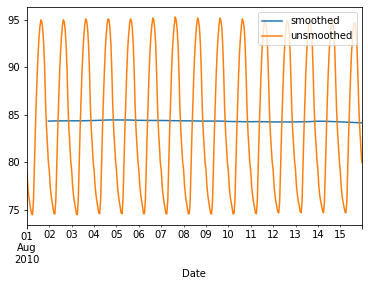

In [40]:
import matplotlib.pyplot as plt
# Extract data : unsmoothed
unsmoothed = austin_df['Temperature']['2010-Aug-01':'2010-Aug-15']

# Apply a rolling mean with a 24 hour window: smoothed
smoothed = unsmoothed.rolling(window=24).mean()

# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})

# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()

### Manipulating Time Series Data

the `.dt` attribute has specialized methods to manipulate datetime

In [49]:
austin_df = pd.read_csv( austin_url, parse_dates=['Date'] )
austin_df

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,2010-01-01 00:00:00
1,44.6,37.1,1.0,2010-01-01 01:00:00
2,44.1,36.9,1.0,2010-01-01 02:00:00
3,43.8,36.9,1.0,2010-01-01 03:00:00
4,43.5,36.8,1.0,2010-01-01 04:00:00
...,...,...,...,...
8754,51.1,38.1,1.0,2010-12-31 19:00:00
8755,49.0,37.9,1.0,2010-12-31 20:00:00
8756,47.9,37.9,1.0,2010-12-31 21:00:00
8757,46.9,37.9,1.0,2010-12-31 22:00:00


In [50]:
austin_df['Date'].dt.hour

0        0
1        1
2        2
3        3
4        4
        ..
8754    19
8755    20
8756    21
8757    22
8758    23
Name: Date, Length: 8759, dtype: int64

In [59]:
#change timezones
central = austin_df['Date'].dt.tz_localize( 'US/Central', nonexistent='shift_backward', ambiguous='NaT' )
central

0      2010-01-01 00:00:00-06:00
1      2010-01-01 01:00:00-06:00
2      2010-01-01 02:00:00-06:00
3      2010-01-01 03:00:00-06:00
4      2010-01-01 04:00:00-06:00
                  ...           
8754   2010-12-31 19:00:00-06:00
8755   2010-12-31 20:00:00-06:00
8756   2010-12-31 21:00:00-06:00
8757   2010-12-31 22:00:00-06:00
8758   2010-12-31 23:00:00-06:00
Name: Date, Length: 8759, dtype: datetime64[ns, US/Central]

In [60]:
eastern = central.dt.tz_convert( 'US/Eastern' )
eastern

0      2010-01-01 01:00:00-05:00
1      2010-01-01 02:00:00-05:00
2      2010-01-01 03:00:00-05:00
3      2010-01-01 04:00:00-05:00
4      2010-01-01 05:00:00-05:00
                  ...           
8754   2010-12-31 20:00:00-05:00
8755   2010-12-31 21:00:00-05:00
8756   2010-12-31 22:00:00-05:00
8757   2010-12-31 23:00:00-05:00
8758   2011-01-01 00:00:00-05:00
Name: Date, Length: 8759, dtype: datetime64[ns, US/Eastern]

In [63]:
wpop_url = 'https://assets.datacamp.com/production/repositories/497/datasets/cc1de7b583ec7eb6196df30845d32241fe15d643/world_population.csv'
wpop = pd.read_csv( wpop_url, parse_dates=['Year'], index_col= 'Year')
wpop

,Total Population
Year,
1960-01-01,3.034971e+09
1970-01-01,3.684823e+09
1980-01-01,4.436590e+09
1990-01-01,5.282716e+09
2000-01-01,6.115974e+09
2010-01-01,6.924283e+09


In [65]:
wpop.resample('A').first()[:15]

,Total Population
Year,
1960-12-31,3.034971e+09
1961-12-31,NaN
1962-12-31,NaN
1963-12-31,NaN
1964-12-31,NaN
1965-12-31,NaN
1966-12-31,NaN
1967-12-31,NaN
1968-12-31,NaN


In [66]:
wpop.resample('A').first().interpolate('linear')[:15]

,Total Population
Year,
1960-12-31,3.034971e+09
1961-12-31,3.099956e+09
1962-12-31,3.164941e+09
1963-12-31,3.229926e+09
1964-12-31,3.294911e+09
1965-12-31,3.359897e+09
1966-12-31,3.424882e+09
1967-12-31,3.489867e+09
1968-12-31,3.554852e+09


In [86]:
sw_url = 'https://assets.datacamp.com/production/repositories/497/datasets/5b808399816c8dcb8eef08336595ef9b4eb22902/austin_airport_departure_data_2015_july.csv'
sw = pd.read_csv( sw_url, skiprows=15, parse_dates=['Date (MM/DD/YYYY)'], index_col= 'Date (MM/DD/YYYY)')
sw.head()

,Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes),Unnamed: 17
Date (MM/DD/YYYY),,,,,,,,,,,,,,,,,
2015-07-01,WN,103.0,N8607M,MDW,06:30,06:52,165.0,147.0,22.0,07:01,9.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,144.0,N8609A,SAN,20:55,20:50,170.0,158.0,-5.0,21:03,13.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,178.0,N646SW,ELP,20:30,20:45,90.0,80.0,15.0,20:55,10.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,232.0,N204WN,ATL,05:45,05:49,135.0,137.0,4.0,06:01,12.0,0.0,0.0,0.0,0.0,0.0,NaN
2015-07-01,WN,238.0,N233LV,DAL,12:30,12:34,55.0,48.0,4.0,12:41,7.0,0.0,0.0,0.0,0.0,0.0,NaN


In [87]:
sw.columns = sw.columns.str.strip()
sw.columns

Index(['Carrier Code', 'Flight Number', 'Tail Number', 'Destination Airport',
       'Scheduled Departure Time', 'Actual Departure Time',
       'Scheduled Elapsed Time(Minutes)', 'Actual Elapsed Time(Minutes)',
       'Departure Delay(Minutes)', 'Wheels-off Time', 'Taxi-out Time(Minutes)',
       'DelayCarrier(Minutes)', 'DelayWeather(Minutes)',
       'DelayNational Aviation System(Minutes)', 'DelaySecurity(Minutes)',
       'DelayLate Aircraft Arrival(Minutes)', 'Unnamed: 17'],
      dtype='object')

In [88]:
dallas = sw['Destination Airport'].str.contains('DAL')
dallas.shape

(1741,)

In [92]:
#dallas.head()
daily_departures = dallas.resample( 'D' ).sum()
stats = daily_departures.describe()
stats

count    31.000000
mean      9.322581
std       1.989759
min       3.000000
25%       9.500000
50%      10.000000
75%      10.000000
max      11.000000
dtype: float64

In [107]:
from datetime import datetime

mask = sw['Destination Airport'] == 'LAX'
la = sw[mask]
la['Date'] = la.index
times_tz_none = pd.to_datetime( la['Date'].dt.strftime('%Y-%m-%d') + ' ' + la['Wheels-off Time'] )
times_tz_none

/home/bonzilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Date (MM/DD/YYYY)
2015-07-01   2015-07-01 05:43:00
2015-07-01   2015-07-01 16:27:00
2015-07-02   2015-07-02 05:47:00
2015-07-02   2015-07-02 16:23:00
2015-07-03   2015-07-03 05:30:00
                     ...        
2015-07-29   2015-07-29 16:29:00
2015-07-30   2015-07-30 05:36:00
2015-07-30   2015-07-30 16:41:00
2015-07-31   2015-07-31 05:39:00
2015-07-31   2015-07-31 17:04:00
Length: 62, dtype: datetime64[ns]

### Time Series Visualization

In [143]:
sp_url = 'https://raw.githubusercontent.com/SmilodonCub/DATA602/master/all_stocks_5yr.csv'
sp = pd.read_csv( sp_url)
sp['date'] = pd.to_datetime( sp['date'] )
sp.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [154]:
spgb = sp.groupby('date')['open','close','volume'].sum()
spgb.head()

/home/bonzilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,open,close,volume
date,,,
2013-02-08,27640.7155,27783.4792,2210298420
2013-02-11,27777.2448,27737.5652,1948002462
2013-02-12,27761.1488,27800.3376,2438463132
2013-02-13,27835.9584,27839.0995,2442872925
2013-02-14,27745.6670,27833.2166,2609614514


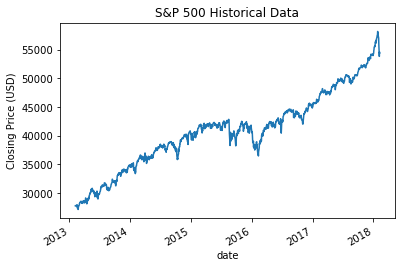

In [155]:
spgb['close'].plot( title = 'S&P 500 Historical Data' )
plt.ylabel( 'Closing Price (USD)' )
plt.show()

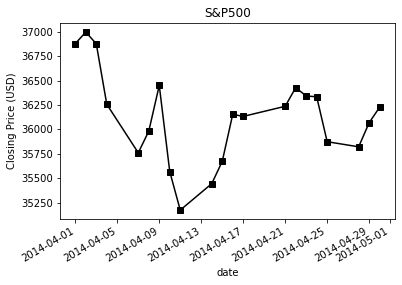

In [156]:
spgb['close'].loc[ '2014-4' ].plot( title = 'S&P500', style = 'ks-' )
plt.ylabel( 'Closing Price (USD)' )
plt.show()

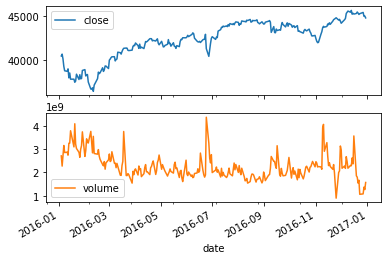

In [157]:
spgb.loc[ '2016', ['close','volume']].plot( subplots=True )
plt.show()

## Case Study - Sunlight in Austin

### Reading and Cleaning the Data

In [159]:
#the data
noaa_url = 'https://assets.datacamp.com/production/repositories/497/datasets/5cac0469c3898e93392343c535d5c96c37ebd3c6/NOAA_QCLCD_2011_hourly_13904.txt'
austin2011_url = 'https://assets.datacamp.com/production/repositories/497/datasets/4d7b2bc6b10b527dc297707fb92fa46b10ac1be5/weather_data_austin_2010.csv'

In [190]:
austin2011 = pd.read_csv( austin2011_url, parse_dates=['Date'], index_col= 'Date')
austin2011.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [163]:
noaa = pd.read_csv( noaa_url, header=None )
noaa.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


In [166]:
clabels = 'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'
column_labels = clabels.split(',')
print( len( column_labels ) )
list_to_drop = ['sky_conditionFlag','visibilityFlag','wx_and_obst_to_vision','wx_and_obst_to_visionFlag',
                'dry_bulb_farenFlag','dry_bulb_celFlag','wet_bulb_farenFlag','wet_bulb_celFlag',
                'dew_point_farenFlag','dew_point_celFlag','relative_humidityFlag','wind_speedFlag',
                'wind_directionFlag','value_for_wind_character','value_for_wind_characterFlag',
                'station_pressureFlag','pressure_tendencyFlag','pressure_tendency','presschange',
                'presschangeFlag','sea_level_pressureFlag','hourly_precip','hourly_precipFlag',
                'altimeter','record_type','altimeterFlag','junk']
len( list_to_drop )

44


27

In [167]:
noaa.columns = column_labels
noaa_dropped = noaa.drop( list_to_drop, axis = 'columns' )
noaa_dropped.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,53,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
1,13904,20110101,153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2,13904,20110101,253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
3,13904,20110101,353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
4,13904,20110101,453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


In [169]:
# Convert the date column to string: df_dropped['date']
noaa_dropped['date'] = noaa_dropped['date'].astype(str)
# Pad leading zeros to the Time column: df_dropped['Time']
noaa_dropped['Time'] = noaa_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))
# Concatenate the new date and Time columns: date_string
date_string = noaa_dropped['date'] + noaa_dropped['Time']
# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')
# Set the index to be the new date_times container: df_clean
noaa_clean = noaa_dropped.set_index( date_times )
# Print the output of df_clean.head()
print(noaa_clean.head())

                      Wban      date  Time  StationType sky_condition  \
2011-01-01 00:53:00  13904  20110101  0053           12        OVC045   
2011-01-01 01:53:00  13904  20110101  0153           12        OVC049   
2011-01-01 02:53:00  13904  20110101  0253           12        OVC060   
2011-01-01 03:53:00  13904  20110101  0353           12        OVC065   
2011-01-01 04:53:00  13904  20110101  0453           12        BKN070   

                    visibility dry_bulb_faren dry_bulb_cel wet_bulb_faren  \
2011-01-01 00:53:00      10.00             51         10.6             38   
2011-01-01 01:53:00      10.00             51         10.6             37   
2011-01-01 02:53:00      10.00             51         10.6             37   
2011-01-01 03:53:00      10.00             50         10.0             38   
2011-01-01 04:53:00      10.00             50         10.0             37   

                    wet_bulb_cel dew_point_faren dew_point_cel  \
2011-01-01 00:53:00          3.1

In [173]:
# Print the dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(noaa_clean.loc['2011-06-20 08':'2011-06-20 08', 'dry_bulb_faren'])
# Convert the dry_bulb_faren column to numeric values: df_clean['dry_bulb_faren']
noaa_clean['dry_bulb_faren'] = pd.to_numeric(noaa_clean['dry_bulb_faren'], errors='coerce')
# Print the transformed dry_bulb_faren temperature between 8 AM and 9 AM on June 20, 2011
print(noaa_clean.loc['2011-06-20 08':'2011-06-20 08', 'dry_bulb_faren'])
# Convert the wind_speed and dew_point_faren columns to numeric values
noaa_clean['wind_speed'] = pd.to_numeric(noaa_clean['wind_speed'], errors='coerce')
noaa_clean['dew_point_faren'] = pd.to_numeric(noaa_clean['dew_point_faren'], errors='coerce')

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64
2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64


In [174]:
noaa_clean.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51.0,10.6,38,3.1,15.0,-9.4,24,15.0,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51.0,10.6,37,3.0,14.0,-10.0,23,10.0,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51.0,10.6,37,2.9,13.0,-10.6,22,15.0,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50.0,10.0,38,3.1,17.0,-8.3,27,7.0,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50.0,10.0,37,2.8,15.0,-9.4,25,11.0,020,29.51,30.04


### Statistical Exploratory Data Analysis

In [182]:
#slicing time series data 

#datetime
print( len( noaa_clean.loc['2011-01-01 04:53:00'] ) )
#n entire day
print( len( noaa_clean.loc[ '2011-06-01' ] ) )
#an entire month
print( len( noaa_clean.loc[ '2011-04' ] ) )
#2 months
print( len( noaa_clean.loc[ '2011-04':'2011-05' ] ) )
#an entire year
print( len( noaa_clean.loc[ '2011' ] ) )

17
37
877
1777
10337


Statistical Methods
* describe()
* mean()
* count()
* median()
* std()

In [185]:
# Print the median of the dry_bulb_faren column
print( noaa_clean['dry_bulb_faren'].median() )
# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(noaa_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())
# Print the median of the dry_bulb_faren column for the month of January
print(noaa_clean.loc['2011-Jan', 'dry_bulb_faren'].median())

72.0
78.0
48.0


In [188]:
# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = noaa_clean.resample( 'D' ).mean()
# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011[ 'dry_bulb_faren' ].values

array([50.16666667, 39.41666667, 46.84615385, 53.36734694, 57.96551724,
       46.95833333, 51.91666667, 51.81481481, 43.61363636, 38.27777778])

In [195]:
austin2011.head()
# Downsample df_climate by day and aggregate by mean: daily_climate
daily_climate = austin2011.resample( 'D' ).mean()
# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_temp_climate = daily_climate.reset_index()['Temperature']

In [197]:
# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())

1.3301831870056482


In [217]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = noaa_clean['sky_condition'].str.contains('CLR')
# Filter df_clean using is_sky_clear
sunny = noaa_clean.loc[is_sky_clear]
# Resample sunny by day then calculate the mean
sunny_daily_mean = sunny['dry_bulb_faren'].resample('D').max()
# See the result
sunny_daily_max.head()

,Wban,StationType,dry_bulb_faren,dew_point_faren,wind_speed
2011-01-01,13904.0,12.0,48.090909,25.181818,9.818182
2011-01-02,13904.0,12.0,29.285714,21.000000,5.285714
2011-01-03,13904.0,12.0,31.000000,25.000000,0.000000
2011-01-04,NaN,NaN,NaN,NaN,NaN
2011-01-05,13904.0,12.0,35.000000,29.000000,0.000000


In [220]:
# Using df_clean, when does sky_condition contain 'OVC'?
is_sky_overcast = noaa_clean['sky_condition'].str.contains('OVC')
# Filter df_clean using is_sky_overcast
overcast = noaa_clean.loc[is_sky_overcast]
# Resample overcast by day then calculate the max
overcast_daily_max = overcast['dry_bulb_faren'].resample('D').max()
# See the result
overcast_daily_max.head()

2011-01-01    51.0
2011-01-02     NaN
2011-01-03    58.0
2011-01-04    57.0
2011-01-05    57.0
Freq: D, Name: dry_bulb_faren, dtype: float64

In [221]:
#THIS IS WRONG. HAVE TO FIX
sunny_daily_max['dry_bulb_faren'].mean() - overcast_daily_max.mean()

-2.588154859739376

### Visual Exploratory Data Analysis

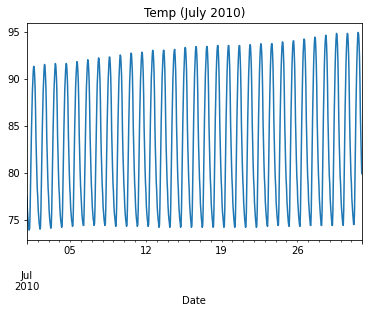

In [226]:
austin2011.Temperature['2010-07'].plot()
plt.title('Temp (July 2010)')
plt.show()

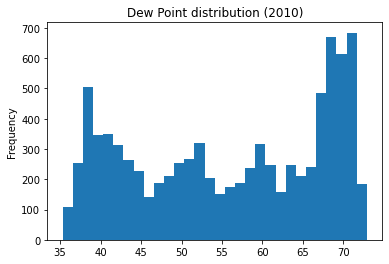

In [227]:
austin2011['DewPoint'].plot( kind='hist', bins=30 )
plt.title( 'Dew Point distribution (2010)' )
plt.show()

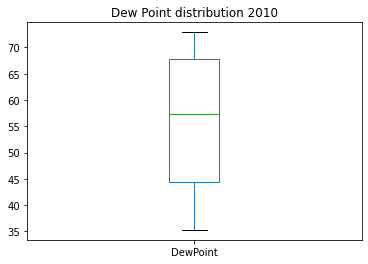

In [228]:
austin2011['DewPoint'].plot( kind='box' )
plt.title( 'Dew Point distribution 2010' )
plt.show()

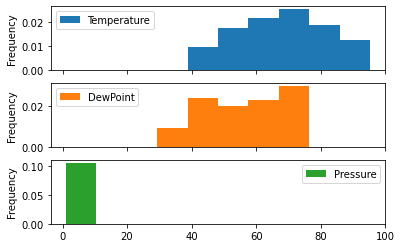

In [230]:
austin2011.plot( kind='hist', density=True, subplots=True )
plt.show()

                 dew_point_faren  dry_bulb_faren
dew_point_faren         1.000000        0.919768
dry_bulb_faren          0.919768        1.000000


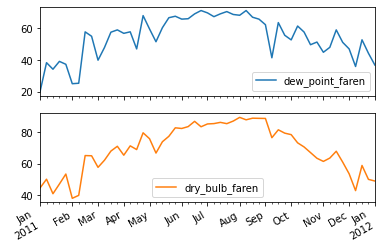

In [248]:
# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = noaa_clean[['dew_point_faren','dry_bulb_faren']].resample('W').mean()                       

# Print the output of weekly_mean.corr()
print(weekly_mean.corr())

# Plot weekly_mean with subplots=True
weekly_mean.plot(subplots=True)
plt.show()

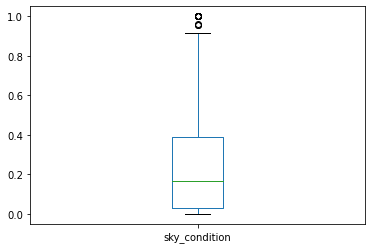

In [252]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = noaa_clean['sky_condition']=='CLR'

# Resample is_sky_clear by day
resampled = is_sky_clear.resample('D')

# Calculate the number of sunny hours per day
sunny_hours = resampled.sum()

# Calculate the number of measured hours per day
total_hours = resampled.count()

# Calculate the fraction of hours per day that were sunny
sunny_fraction = sunny_hours / total_hours

# Make a box plot of sunny_fraction
sunny_fraction.plot(kind='box')
plt.show()

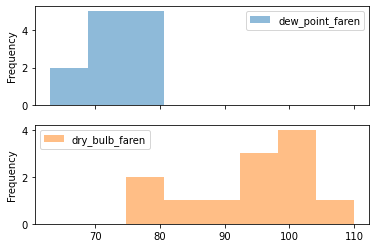

In [253]:
# Resample dew_point_faren and dry_bulb_faren by Month, aggregating the maximum values: monthly_max
monthly_max = noaa_clean[['dew_point_faren','dry_bulb_faren']].resample('M').max()

# Generate a histogram with bins=8, alpha=0.5, subplots=True
monthly_max.plot( kind='hist', bins=8, alpha=0.5, subplots=True)

# Show the plot
plt.show()

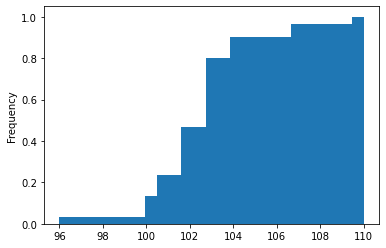

In [269]:
# Extract the maximum temperature in August 2010 from df_climate: august_max
august_max = austin2011.loc['2010-08','Temperature'].max()
#print(august_max)

# Resample August 2011 temps in df_clean by day & aggregate the max value: august_2011
august_2011 = noaa_clean.loc['2011-Aug','dry_bulb_faren'].resample('D').max()
#print( august_2011)

# Filter for days in august_2011 where the value exceeds august_max: august_2011_high
august_2011_high = august_2011[august_2011>august_max]

# Construct a CDF of august_2011_high
august_2011_high.plot( kind='hist', bins=25, density='True', cumulative=True)

# Display the plot
plt.show()

### Summary
Here we learned:
* Import many types of datasets and deal with important issues
* Export data to facilitate collaborative data science
* Perform statistical and visual EDA natiely in `pandas`